In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sys
sys.path.append(r'\Users\Mochi\AppData\Local\Programs\Python\Python310\Lib\site-packages')
import quads
import numpy as np
import random

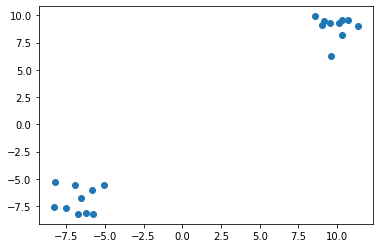

In [5]:
X, y = make_blobs(n_samples=20, centers=2, n_features=2,random_state=90)
plt.scatter(X[:,0], X[:,1]);

In [6]:
class Node:
    def __init__(self, node_id, dataset):
        """
        dataset : np.array
        """
        self.node_id = node_id
        self.dataset = dataset
        self.points = dataset[:,:-1]
        self.clusters = dataset[:,-1]
        self.parent = None
        self.left = None
        self.right = None
    
    def __repr__(self):
        return 'Node {}: {}'.format(str(self.node_id), str(self.dataset))

       
    def add_left(self, left_children, current_id):
        left = Node(current_id+1, left_children)
        left.parent = self
        self.left = left
        
    def add_right(self, right_children, current_id):
        right = Node(current_id+2, right_children)
        right.parent = self
        self.right = right

In [16]:
class Fair_Split_Tree:
    """A node contained in a fair split tree.

    """

    def __init__(self, dataset, k):
        """
        dataset : np.array
        """
        self.dataset = dataset
        self.root = Node(0, dataset)
        self.nodes = []
        self.k = k
        
        self.nodes.append(self.root)
      
    def pick_random(self, dataset):
        print(dataset.shape)
        same = True
        labels = dataset[:,-1]
        if (labels == labels[0]).all():
            while same:
                
                points = np.array(random.choices(dataset, k=2))
                print("found points: ", points)
                if not (points[0][:-1] == points[1][:-1]).all():
                    same = False
        else:
            while same:
                
                points = np.array(random.choices(dataset, k=2))
                print("found points: ", points)
                if not (points[0][:-1] == points[1][:-1]).all() and not points[0][-1] == points[1][-1] :
                    same = False
        new_points = np.array([points[0][:-1],points[1][:-1]])
        print("new points")
        print(new_points)
        return new_points
    def compute_plane(self, points):
        """
            v = direction vector
            w = unit vector
            mid = midpoint
        """
        
        v = points[0]-points[1]
        w = v / np.linalg.norm(v)
        mid = np.sum(points, axis=0)/2
        return w, mid
    def compute_bounding_box(self, points):
        
    
    def split_tree(self, node):
        points = self.pick_random(node.dataset)
        w, mid = self.compute_plane(points)
        left = []
        right = []
        for i in range(node.points.shape[0]):
            x = node.points[i]
            x = x - mid
            if np.dot(w,x) > 0:
                left.append(node.dataset[i])
            elif np.dot(w,x) < 0:
                right.append(node.dataset[i])
        if len(left)+len(right) != node.points.shape[0]:
            print("error")
        
        #plots out each split
        print('Node', len(self.nodes), 'and', len(self.nodes)+1)
        plt.scatter(np.array(left)[:,0], np.array(left)[:,1], c='blue');
        plt.scatter(np.array(right)[:,0], np.array(right)[:,1], c='red');
        plt.show()
        
        
        node.add_left(np.array(left), len(self.nodes)-1)
        node.add_right(np.array(right), len(self.nodes)-1)
        self.nodes.append(node.left)
        self.nodes.append(node.right)
        
        
        if len(left) > self.k:
            self.split_tree(node.left)
        if len(right) > self.k:
            self.split_tree(node.right)

    def build_tree(self):       
        if self.dataset.shape[0] == 1:
            return self
        else:
            node = self.root
            self.split_tree(node)
            return self
         

In [8]:
y = np.reshape(y, (-1, 1))

In [9]:
newX = np.append(X,y, axis=1)

In [17]:
fsp = Fair_Split_Tree(newX, 4)

(20, 3)
found points:  [[ 8.58616299  9.91369418  1.        ]
 [-5.08198438 -5.59910644  0.        ]]
new points
[[ 8.58616299  9.91369418]
 [-5.08198438 -5.59910644]]
Node 1 and 2


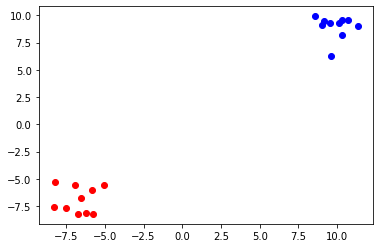

(10, 3)
found points:  [[10.12475558  9.30632609  1.        ]
 [ 8.58616299  9.91369418  1.        ]]
new points
[[10.12475558  9.30632609]
 [ 8.58616299  9.91369418]]
Node 3 and 4


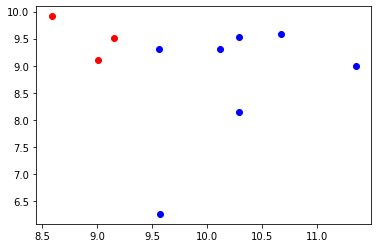

(7, 3)
found points:  [[10.12475558  9.30632609  1.        ]
 [ 9.5647992   9.31835533  1.        ]]
new points
[[10.12475558  9.30632609]
 [ 9.5647992   9.31835533]]
Node 5 and 6


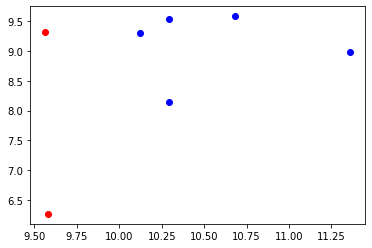

(5, 3)
found points:  [[10.67909231  9.58337139  1.        ]
 [10.12475558  9.30632609  1.        ]]
new points
[[10.67909231  9.58337139]
 [10.12475558  9.30632609]]
Node 7 and 8


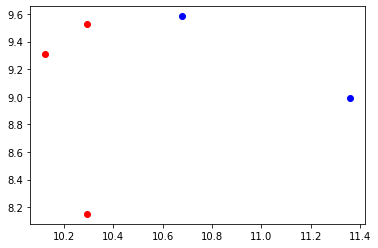

(10, 3)
found points:  [[-5.85684055 -6.06433804  0.        ]
 [-8.19932446 -5.28656615  0.        ]]
new points
[[-5.85684055 -6.06433804]
 [-8.19932446 -5.28656615]]
Node 9 and 10


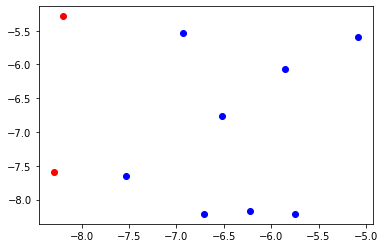

(8, 3)
found points:  [[-7.53031496 -7.64551443  0.        ]
 [-7.53031496 -7.64551443  0.        ]]
found points:  [[-5.85684055 -6.06433804  0.        ]
 [-6.92504061 -5.53672256  0.        ]]
new points
[[-5.85684055 -6.06433804]
 [-6.92504061 -5.53672256]]
Node 11 and 12


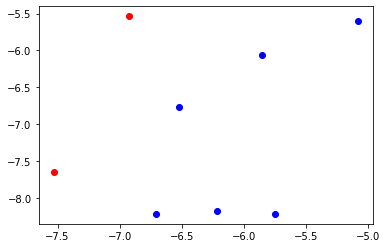

(6, 3)
found points:  [[-6.21796013 -8.17184853  0.        ]
 [-5.74880652 -8.21218165  0.        ]]
new points
[[-6.21796013 -8.17184853]
 [-5.74880652 -8.21218165]]
Node 13 and 14


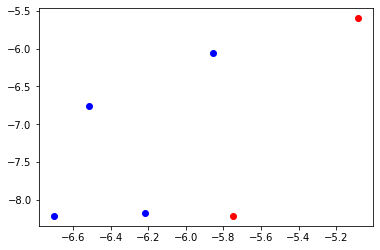

In [18]:
tree = fsp.build_tree()
    